# Modelo de equação diferencial ordinária usado ModelingToolkit


Matheus Elis da Silva  
matheuselis@id.uff.br


## ModelingToolkit

[ModelingToolkit.jl](https://mtk.sciml.ai/dev/) é uma linguagem de modelagem para computação numérica-simbólica de alto desempenho em computação científica e aprendizado de máquina científico. Em seguida, ele mistura ideias de sistemas de álgebra computacional simbólica com estruturas de modelagem baseadas em equações causais e acausais para fornecer um sistema de modelagem extensível e paralelo. Ele permite que os usuários forneçam uma descrição de alto nível de um modelo para pré-processamento simbólico para analisar e aprimorar o modelo. Transformações automáticas, como redução de índice, podem ser aplicadas ao modelo antes de resolvê-lo, a fim de torná-lo fácil de lidar com as equações que não poderiam ser resolvidas quando modeladas sem intervenção simbólica.

A versão classica do SIR em ODE é dada por:
   * Determinística
   * Continuo no tempo
   * Contínuo no estado
   
Esta versão, ao contrário da versão 'vanilla' ODE, usa ModelingToolkit. Para pequenos problemas como esse, não faz muita diferença para o tempo de computação, mas é um pouco mais expressivo e se presta a se estender um pouco melhor.

## Implementação em Julia

### Bibliotecas

Inicialmente precisamos instalar e carregar as bibliotecas no ambiente de programação.  
Só é necessario instalar as bibliotecas uma unica vez no computador, após isso as funções `Pkg.add()` podem ser comentadas

In [1]:
using Pkg
#Pkg.add("DifferentialEquations")
#Pkg.add("ModelingToolkit")
#Pkg.add("DataFrames")
#Pkg.add("StatsPlots")
#Pkg.add("OrdinaryDiffEq")
#Pkg.add("BenchmarkTools")


In [2]:
using DifferentialEquations
using ModelingToolkit
using OrdinaryDiffEq
using DataFrames
using StatsPlots
using BenchmarkTools

### ODE

A função a seguir define as equações diferenciais do modelo que serão utilizadas para a simulação. Devemos tambem definir quais são os parametros das equações utilizando `@parameters`, as variaveis utilizando `@variables` e as derivadas utilizando `derivatives`. Logo após definimos o tamanho da população e o conjunto de equações.

In [3]:
@parameters t β c γ
@variables S(t) I(t) R(t)
D = Differential(t)
N=S+I+R # This is recognized as a derived variable
eqs = [D(S) ~ -β*c*I/N*S,
       D(I) ~ β*c*I/N*S-γ*I,
       D(R) ~ γ*I];

In [4]:
sys = ODESystem(eqs);

### Domínio do Tempo

Nós agora precisamos setar um intervalo de tempo em que a simulação irá funcionar e que será dado por `tspan`, o salto de tempo que será dado por `δt` e o tempo maximo que será dado por `tmax`.

In [5]:
δt = 0.1
tmax = 40.0
tspan = (0.0,tmax)
t=0.0:δt:tmax;

### Condições iniciais 

Em `ModelingToolkit`, os valores iniciais são definidos utilizando dicionários.

In [6]:
u0 = [S => 990.0,
      I => 10.0,
      R => 0.0];

### Parammetros do Modelo

Similarmente, os parametros são definidos utilizando dicionários.

In [7]:
p = [β=>0.05,
     c=>10.0,
     γ=>0.25];

### Execução do Modelo

Primeiro iremos gerar um objeto do tipo `ODEProblem` utilizando a função que modela a equação diferencial, `sir_ode`, as condições iniciais, `u0`, o intervalo de tempo, `tspan` e os paramêtros , `p`.

In [8]:
prob_ode = ODEProblem(sys,u0,tspan,p;jac=true);

Logo após iremos utilizar a função `solve()` para resolver o objeto criado acima.


In [9]:
sol_ode = solve(prob_ode,saveat = δt);

### Pós processamento

Para ficar mais facil de vizulizar os dados iremos juntar o output da função `solve()` em um dataframe.

In [10]:
df_ode = DataFrame(sol_ode)
df_ode[!,:t] = t;

### Plot do Resultado

Agora nós podemos plotar o resultado para vizualizar o resultado.

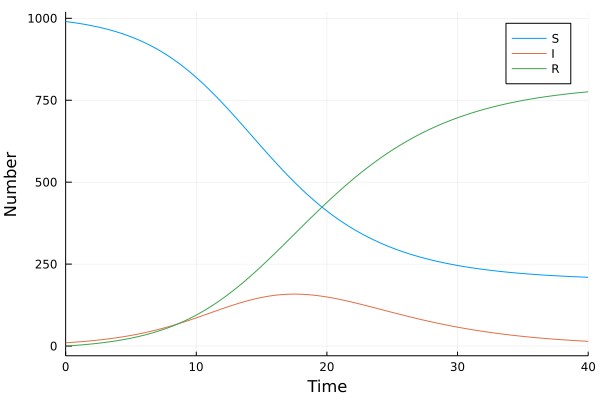

In [11]:
plot(sol_ode,
    label=["S" "I" "R"],
    xlabel="Time",
    ylabel="Number")

## Benchmarking do problema

Para fazer um benchmarking de uma função basta utilizar a função `@benchmark` antes da função desejada

In [12]:
@benchmark solve(prob_ode)

BenchmarkTools.Trial: 
  memory estimate:  34.86 KiB
  allocs estimate:  288
  --------------
  minimum time:     24.000 μs (0.00% GC)
  median time:      32.700 μs (0.00% GC)
  mean time:        36.315 μs (8.90% GC)
  maximum time:     11.389 ms (99.55% GC)
  --------------
  samples:          10000
  evals/sample:     1